Por:
Edgardo Nieto
Adrien Valenzuela

Importar modulos y leer datos

In [ ]:
import pandas as pd

import seaborn as sns; sns.set()

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

DF = pd.read_csv('covid19tests.csv')




Limpieza de datos

camiar el tipo de los datos a numeros de punto flotante

In [ ]:

#quitar comas otros characteres de columnas numericass
DF['tests'] = DF['tests'].str.replace(",", "")
DF['tests'] = DF['tests'].str.replace("*", "")
DF['positive'] = DF['positive'].str.replace(",", "")
DF['positive'] = DF['positive'].str.replace("*", "")

DF['testper1m'] = DF['testper1m'].str.replace(",", "")
#cambiar el tipo de columnas a numeros de punto flotante
DF["tests"]= DF['tests'].astype(float)
DF["positive"]= DF['positive'].astype(float)
DF["testper1m"]= DF['testper1m'].astype(float)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [ ]:
DF.head(10)

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0
5,NaN,Bahrain,BHR,BH,37996.0,668.0,3-Apr,24210.0,17.6
6,NaN,Bangladesh,BGD,BD,1602.0,54.0,1-Apr,10.0,33.7
7,NaN,Barbados,BRB,BB,382.0,45.0,1-Apr,1331.0,118.0
8,NaN,Belarus,BLR,BY,32000.0,362.0,3-Apr,3371.0,11.3
9,NaN,Belgium,BEL,BE,18360.0,1486.0,18-Mar,1594.0,81.0


In [ ]:
DF.tail(10)

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m
101,Illinos,US,USA,US,43656.0,7695.0,2-Apr,3445.0,176.0
102,Louisiana,US,USA,US,51086.0,9150.0,2-Apr,10963.0,126.0
103,New York,US,USA,US,238965.0,92381.0,2-Apr,12284.0,387.0
104,New Jersey,US,USA,US,59110.0,25590.0,2-Apr,6655.0,433.0
105,Michigan,US,USA,US,22684.0,10791.0,2-Apr,2264.0,476.0
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4
110,NaN,Vietnam,VNM,VN,73164.0,233.0,3-Apr,760.0,3.2


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         31 non-null     object 
 1   country        111 non-null    object 
 2   alpha3code     110 non-null    object 
 3   alpha2code     111 non-null    object 
 4   tests          111 non-null    float64
 5   positive       109 non-null    float64
 6   date           111 non-null    object 
 7   testper1m      111 non-null    float64
 8   positiveper1m  110 non-null    float64
dtypes: float64(4), object(5)
memory usage: 7.9+ KB


In [ ]:
DF.shape

(111, 9)

Poner columna agregando  tasa de casos positivos

In [ ]:
DF["ratepositive"] = DF.positive/DF.tests
DF

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0,0.199463
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0,0.184013
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0,0.019318
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0,0.115412
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0,0.014767
...,...,...,...,...,...,...,...,...,...,...
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0,0.092129
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0,0.082916
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0,0.122887
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4,0.080382


Hacer nuevo data frame para separa los datos regionales del resto del data frame

In [ ]:
df_c = DF[DF["region"].isnull()]
df_c

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0,0.199463
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0,0.184013
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0,0.019318
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0,0.115412
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0,0.014767
...,...,...,...,...,...,...,...,...,...,...
97,NaN,United Kingdom,GBR,GB,163194.0,33718.0,2-Apr,2416.0,207.0,0.206613
98,NaN,US,USA,US,1350219.0,241734.0,2-Apr,4114.0,179.0,0.179033
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0,0.122887
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4,0.080382


Nuevo data frame con los datos para separar datos regionales de USA

In [ ]:
df_usa = DF[DF["alpha3code"] == "USA"]
df_usa = df_usa[df_usa["region"].notnull()]
df_usa

,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
99,California,US,USA,US,92500.0,9191.0,2-Apr,2341.0,99.0,0.099362
100,Florida,US,USA,US,80356.0,9008.0,3-Apr,3741.0,115.0,0.112101
101,Illinos,US,USA,US,43656.0,7695.0,2-Apr,3445.0,176.0,0.176264
102,Louisiana,US,USA,US,51086.0,9150.0,2-Apr,10963.0,126.0,0.179110
103,New York,US,USA,US,238965.0,92381.0,2-Apr,12284.0,387.0,0.386588
104,New Jersey,US,USA,US,59110.0,25590.0,2-Apr,6655.0,433.0,0.432922
105,Michigan,US,USA,US,22684.0,10791.0,2-Apr,2264.0,476.0,0.475710
106,Texas,US,USA,US,50679.0,4669.0,2-Apr,1748.0,92.0,0.092129
107,Washington,US,USA,US,79418.0,6585.0,1-Apr,10429.0,86.0,0.082916


Estados de USA con tasas de pruebas positivas mas altas

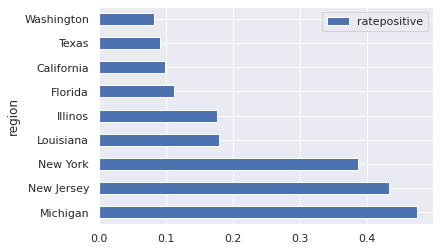

In [ ]:
plot_rate_us = pd.DataFrame(df_usa.groupby(by='region').ratepositive.sum())
plot_rate_us = plot_rate_us.sort_values("ratepositive", ascending=False).head(10)

plot_rate_us.plot(kind='barh')

Estados que realizaron mayor numero de pruebas

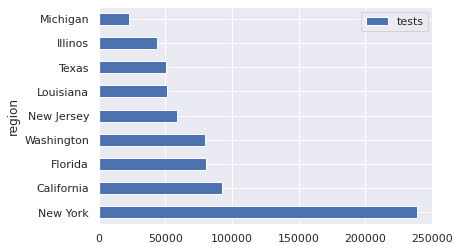

In [ ]:
plot_rate_us = pd.DataFrame(df_usa.groupby(by='region').tests.sum())
plot_rate_us = plot_rate_us.sort_values("tests", ascending=False).head(10)

plot_rate_us.plot(kind='barh')

Estados que realizaron más pruebas por millon de habitantes

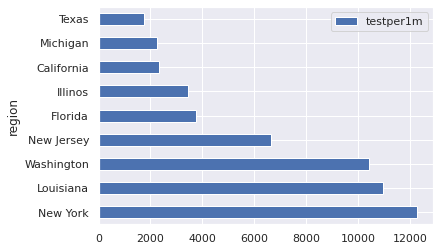

In [ ]:
plot_rate_us = pd.DataFrame(df_usa.groupby(by='region').testper1m.sum())
plot_rate_us = plot_rate_us.sort_values("testper1m", ascending=False).head(10)

plot_rate_us.plot(kind='barh')

Los diez países que realizaron más pruebas

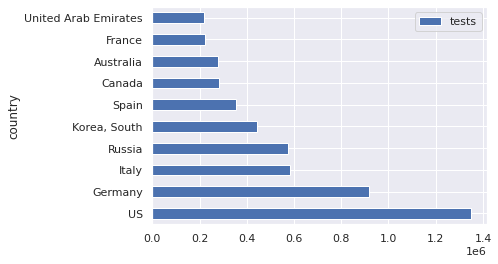

In [ ]:
plot_test = pd.DataFrame(df_c.groupby(by='country').tests.sum())
plot_test = plot_test.sort_values("tests", ascending=False).head(10)

plot_test.plot(kind='barh')





Países con el mayor numero de casos

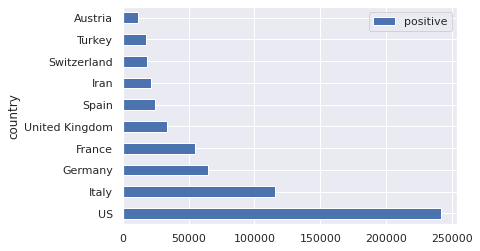

In [ ]:
plot_testpm = pd.DataFrame(df_c.groupby(by='country').positive.sum())
plot_testpm = plot_testpm.sort_values("positive", ascending=False).head(10)

plot_testpm.plot(kind='barh')


Tasa de pruebas positivas en estados unidos entre otros

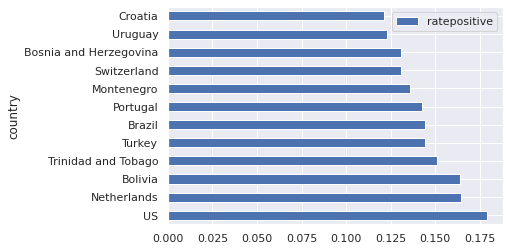

In [ ]:
plot_testpm = pd.DataFrame(df_c.groupby(by='country').ratepositive.sum())
plot_testpm = plot_testpm.sort_values("ratepositive", ascending=False).iloc[12:24]

plot_testpm.plot(kind='barh')


Los diez países que realizaron más pruebas por cada millon de habitantes

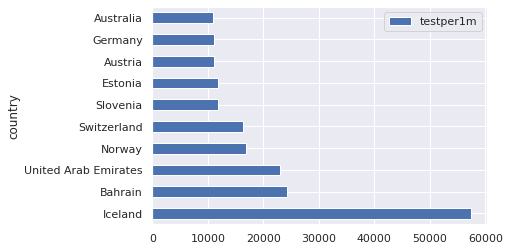

In [ ]:
plot_testpm = pd.DataFrame(df_c.groupby(by='country').testper1m.sum())
plot_testpm = plot_testpm.sort_values("testper1m", ascending=False).head(10)

plot_testpm.plot(kind='barh')



Países con tasas de pruebas positivas mas altas

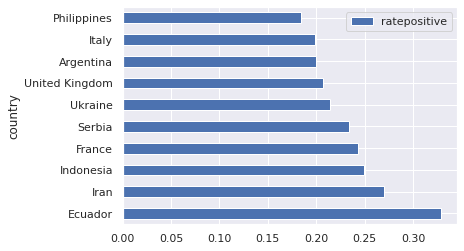

In [ ]:
plot_testpm = pd.DataFrame(df_c.groupby(by='country').ratepositive.sum())
plot_testpm = plot_testpm.sort_values("ratepositive", ascending=False).head(10)

plot_testpm.plot(kind='barh')

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt

limpieza de datos para regresion

In [ ]:
df_c = df_c.dropna(subset=['positive', "tests"])
df_c


,region,country,alpha3code,alpha2code,tests,positive,date,testper1m,positiveper1m,ratepositive
0,NaN,Argentina,ARG,AR,4843.0,966.0,31-Mar,107.0,199.0,0.199463
1,NaN,Armenia,ARM,AM,3603.0,663.0,2-Apr,1221.0,74.0,0.184013
2,NaN,Australia,AUS,AU,277355.0,5358.0,3-Apr,10919.0,19.0,0.019318
3,NaN,Austria,AUT,AT,98343.0,11350.0,3-Apr,11047.0,101.0,0.115412
4,NaN,Azerbaijan,AZE,AZ,30000.0,443.0,3-Apr,3031.0,15.0,0.014767
...,...,...,...,...,...,...,...,...,...,...
97,NaN,United Kingdom,GBR,GB,163194.0,33718.0,2-Apr,2416.0,207.0,0.206613
98,NaN,US,USA,US,1350219.0,241734.0,2-Apr,4114.0,179.0,0.179033
108,NaN,Uruguay,URY,UY,1538.0,189.0,24-Mar,443.0,123.0,0.122887
109,NaN,Venezuela,VEN,VE,1779.0,143.0,31-Mar,62.0,80.4,0.080382


regresion linear

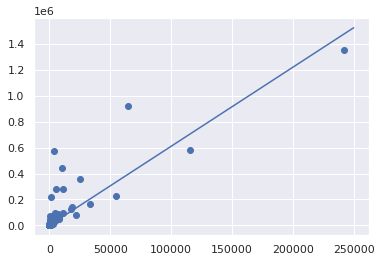

In [ ]:
x = np.asarray(df_c["positive"])
y = np.asarray(df_c["tests"])

model = LinearRegression(fit_intercept=False)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 250000, 1000)
yfit = model.predict(xfit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(xfit, yfit);



Para el Readme

1. Motivo
La pandemia por covid 19 fue un evento con un impacto global
2. Fuentes
https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
https://numpy.org/doc/stable/reference/generated/numpy.asarray.html
3. Metas
Entender mejor la pandemia y usu efectos mediante el uso de los datos

4. Que elementos
Nos enfocamos en numero de pruebas en total y pruebas positivas

Conclusion adrien:
Entender las estadísticas de covid puede ser una tarea difícil. Es importante tomar en cuenta el número de pruebas realizadas y la tasa de casos positivos. Por ejemplo, estados unidos que a pesar de que es a primera vista el país con el mayor número de pruebas positivas, debería considerarse que es una país con un gran número de habitantes, además de ser el país que realizo el mayor número de pruebas y que su tasa de pruebas positivas no es tan alta.

Conclusion gardo: